<a href="https://colab.research.google.com/github/arimohy/challenge1-data-science-latam/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [26]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [2]:
#Ingreso total por cada tienda

facturacion_por_tienda={
    'Tienda':['Tienda1','Tienda2','Tienda3','Tienda4'],
    'Ingreso Total':[tienda['Precio'].sum(), tienda2['Precio'].sum(),tienda3['Precio'].sum() ,tienda4['Precio'].sum()]
}

df_facturacion_por_tienda = pd.DataFrame(facturacion_por_tienda)

display(df_facturacion_por_tienda)


,Tienda,Ingreso Total
0,Tienda1,1.150880e+09
1,Tienda2,1.116344e+09
2,Tienda3,1.098020e+09
3,Tienda4,1.038376e+09


# 2. Ventas por categoría

In [3]:
def contar_ventas_por_categoria(df, nombre_tienda):
    resultado = df.groupby('Categoría del Producto').size().reset_index(name='CV_' + str(nombre_tienda))
    return resultado

ventas_tienda1 = contar_ventas_por_categoria(tienda, 'Tienda1')
ventas_tienda2 = contar_ventas_por_categoria(tienda2, 'Tienda2')
ventas_tienda3 = contar_ventas_por_categoria(tienda3, 'Tienda3')
ventas_tienda4 = contar_ventas_por_categoria(tienda4, 'Tienda4')


ventas_merged = ventas_tienda1.merge(ventas_tienda2, on='Categoría del Producto', how='outer') \
                               .merge(ventas_tienda3, on='Categoría del Producto', how='outer') \
                               .merge(ventas_tienda4, on='Categoría del Producto', how='outer')


display(ventas_merged)


,Categoría del Producto,CV_Tienda1,CV_Tienda2,CV_Tienda3,CV_Tienda4
0,Artículos para el hogar,171,181,177,201
1,Deportes y diversión,284,275,277,277
2,Electrodomésticos,312,305,278,254
3,Electrónicos,448,422,451,451
4,Instrumentos musicales,182,224,177,170
5,Juguetes,324,313,315,338
6,Libros,173,197,185,187
7,Muebles,465,442,499,480


In [4]:
for t in ventas_merged.columns[1:]:
    top_categorias = ventas_merged[['Categoría del Producto', t]].sort_values(by=t, ascending=False).head(3)
    print(f"\nTop 3 categorías en {t}:")
    print(top_categorias.to_string(index=False))



Top 3 categorías en CV_Tienda1:
Categoría del Producto  CV_Tienda1
               Muebles         465
          Electrónicos         448
              Juguetes         324

Top 3 categorías en CV_Tienda2:
Categoría del Producto  CV_Tienda2
               Muebles         442
          Electrónicos         422
              Juguetes         313

Top 3 categorías en CV_Tienda3:
Categoría del Producto  CV_Tienda3
               Muebles         499
          Electrónicos         451
              Juguetes         315

Top 3 categorías en CV_Tienda4:
Categoría del Producto  CV_Tienda4
               Muebles         480
          Electrónicos         451
              Juguetes         338


# 3. Calificación promedio de la tienda


In [5]:
#calificacion tienda

calificacion_por_tienda={
    'Tienda':['Tienda1','Tienda2','Tienda3','Tienda4'],
    'Calificacion Promedio':[tienda['Calificación'].mean(), tienda2['Calificación'].mean(),tienda3['Calificación'].mean() ,tienda4['Calificación'].mean()]
}

df_calificacion_por_tienda = pd.DataFrame(calificacion_por_tienda)

display(df_calificacion_por_tienda)

,Tienda,Calificacion Promedio
0,Tienda1,3.976685
1,Tienda2,4.037304
2,Tienda3,4.048326
3,Tienda4,3.995759


# 4. Productos más y menos vendidos

In [6]:
def contar_productos(df, nombre_tienda):
    resultado = df.groupby('Producto').size().reset_index(name='#prod_' + str(nombre_tienda))
    return resultado

ventas_tienda1 = contar_productos(tienda, 'T1')
ventas_tienda2 = contar_productos(tienda2, 'T2')
ventas_tienda3 = contar_productos(tienda3, 'T3')
ventas_tienda4 = contar_productos(tienda4, 'T4')


productos_merged = ventas_tienda1.merge(ventas_tienda2, on='Producto', how='outer') \
                               .merge(ventas_tienda3, on='Producto', how='outer') \
                               .merge(ventas_tienda4, on='Producto', how='outer')


display(productos_merged)


,Producto,#prod_T1,#prod_T2,#prod_T3,#prod_T4
0,Ajedrez de madera,49,45,47,39
1,Armario,60,54,49,34
2,Asistente virtual,40,38,39,50
3,Auriculares,50,37,43,44
4,Auriculares con micrófono,33,44,39,42
5,Balón de baloncesto,55,42,50,50
6,Balón de voleibol,42,46,48,48
7,Batería,53,61,41,48
8,Bicicleta,54,45,52,45
9,Bloques de construcción,56,54,35,54


In [7]:
# Mostrar top 5 más y menos vendidos por tienda
for columna in productos_merged.columns[1:]:
    ti = columna.replace("Cantidad Vendida ", "")
    datos = productos_merged[['Producto', columna]]

    top_mas = datos.nlargest(5, columna)
    top_menos = datos.nsmallest(5, columna)
    print("=======================================================")

    print(f"\n🟢 Top 5 productos MÁS vendidos en {ti[-2:]}:")
    print(top_mas.to_string(index=False))

    print(f"\n🔴 Top 5 productos MENOS vendidos en {ti[-2:]}:")
    print(top_menos.to_string(index=False))



🟢 Top 5 productos MÁS vendidos en T1:
               Producto  #prod_T1
                Armario        60
             Microondas        60
          TV LED UHD 4K        60
       Secadora de ropa        58
Bloques de construcción        56

🔴 Top 5 productos MENOS vendidos en T1:
                   Producto  #prod_T1
  Auriculares con micrófono        33
               Celular ABXY        33
            Olla de presión        35
                  Pandereta        36
Ciencia de datos con Python        39

🟢 Top 5 productos MÁS vendidos en T2:
                 Producto  #prod_T2
Iniciando en programación        65
               Microondas        62
                  Batería        61
        Guitarra acústica        58
                Pandereta        58

🔴 Top 5 productos MENOS vendidos en T2:
       Producto  #prod_T2
  Juego de mesa        32
      Impresora        34
Mesa de comedor        34
         Sillón        35
    Auriculares        37

🟢 Top 5 productos MÁS vendidos en T

# 5. Envío promedio por tienda

In [8]:
#promedio de envio por tienda
costo_envio_por_tienda={
    'Tienda':['Tienda1','Tienda2','Tienda3','Tienda4'],
    'Calificacion Promedio':[tienda['Costo de envío'].mean(), tienda2['Costo de envío'].mean(),tienda3['Costo de envío'].mean() ,tienda4['Costo de envío'].mean()]
}

df_costo_envio_por_tienda = pd.DataFrame(costo_envio_por_tienda)

display(df_costo_envio_por_tienda)

,Tienda,Calificacion Promedio
0,Tienda1,26018.609580
1,Tienda2,25216.235693
2,Tienda3,24805.680373
3,Tienda4,23459.457167


## Visualización de Datos


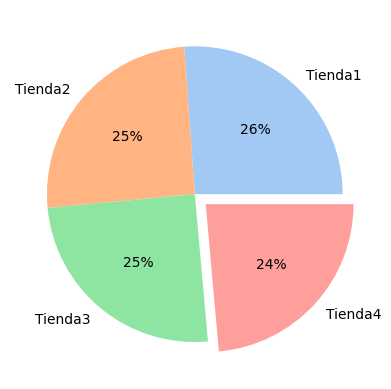

In [9]:
import matplotlib.pyplot as plt
import seaborn

data = df_facturacion_por_tienda['Ingreso Total']
keys = df_facturacion_por_tienda['Tienda']

explode = [0, 0, 0, 0.1]
palette_color = seaborn.color_palette('pastel')

plt.pie(data, labels=keys, colors=palette_color,
		explode=explode, autopct='%.0f%%')

plt.show()



In [10]:
import plotly.express as px

df = pd.DataFrame(ventas_merged)

# Convertimos a formato largo (long-form)
df_melted = df.melt(id_vars='Categoría del Producto', var_name='Tienda', value_name='Cantidad')

# Gráfico interactivo
fig = px.bar(df_melted,
             x='Cantidad',
             y='Categoría del Producto',
             color='Tienda',
             barmode='group',
             orientation='h',
             title='Cantidad Vendida por Tienda y Categoría de Producto')

fig.update_layout(yaxis_title="Categoría del Producto", xaxis_title="Cantidad Vendida")
fig.show()

In [11]:
top_data = []

for columna in productos_merged.columns[1:]:
    ctienda = columna.replace("Cantidad Vendida ", "")
    datos = productos_merged[['Producto', columna]].copy()

    top_mas = datos.nlargest(5, columna).copy()
    top_mas['Tipo'] = 'Más vendidos'
    top_mas['Tienda'] = ctienda
    top_mas = top_mas.rename(columns={columna: 'Cantidad'})

    top_menos = datos.nsmallest(5, columna).copy()
    top_menos['Tipo'] = 'Menos vendidos'
    top_menos['Tienda'] = ctienda
    top_menos = top_menos.rename(columns={columna: 'Cantidad'})

    top_data.append(pd.concat([top_mas, top_menos]))

df_top = pd.concat(top_data, ignore_index=True)

fig = px.scatter(
    df_top,
    x="Tienda",
    y="Producto",
    color="Tipo",
    size="Cantidad",
    hover_name="Producto",
    title="Top 5 Más y Menos Vendidos por Tienda - Dispersión con Tamaño",
    size_max=30
)

fig.update_layout(
    yaxis={'categoryorder':'total descending'},
    height=800
)

fig.show()




In [12]:
fig = px.line(df_costo_envio_por_tienda,
              x="Tienda",
              y="Calificacion Promedio",
              markers=True,
              title="Tendencia del Costo de Envío Promedio por Tienda")

fig.update_traces(line_color='MediumPurple')
fig.update_layout(yaxis_title="Costo Promedio de Envío")
fig.show()


# 📊 Análisis de Rendimiento - Alura Store

Durante este desafío, ayudamos al Sr. Juan a decidir qué tienda de su cadena **Alura Store** debe vender para iniciar un nuevo emprendimiento. Para ello, analizamos datos de ventas, rendimiento, calificaciones, y costos de envío de las 4 tiendas. El objetivo fue identificar la tienda **menos eficiente** y presentar una recomendación final basada en datos.

---

## 1. 💰 Facturación Total por Tienda

| Tienda  | Ingreso Total     |
|---------|-------------------|
| Tienda1 | 1,150,880,000     |
| Tienda2 | 1,116,344,000     |
| Tienda3 | 1,098,020,000     |
| Tienda4 | **1,038,376,000** |

🔻 **Tienda4** presenta el ingreso total más bajo entre las 4.
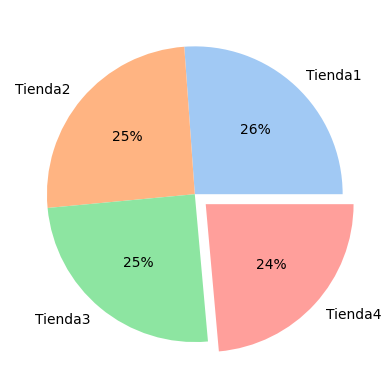
---

## 2. 🧺 Ventas por Categoría de Producto

| Categoría del Producto       | CV_Tienda1 | CV_Tienda2 | CV_Tienda3 | CV_Tienda4 |
|-----------------------------|------------|------------|------------|------------|
| Artículos para el hogar     | 171        | 181        | 177        | 201        |
| Deportes y diversión        | 284        | 275        | 277        | 277        |
| Electrodomésticos           | 312        | 305        | 278        | 254        |
| Electrónicos                | 448        | 422        | 451        | 451        |
| Instrumentos musicales      | 182        | 224        | 177        | **170**    |
| Juguetes                    | 324        | 313        | 315        | 338        |
| Libros                      | 173        | 197        | 185        | 187        |
| Muebles                     | **465**    | 442        | 499        | 480        |

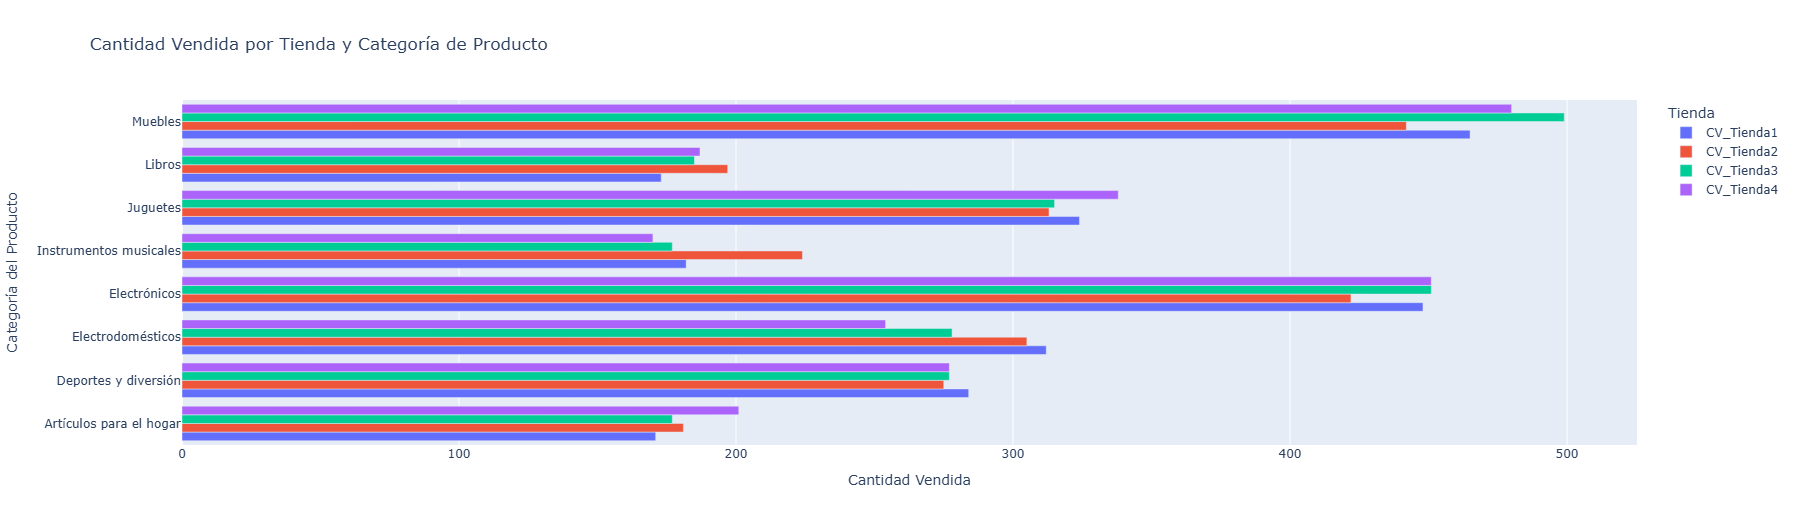
📌 Observaciones:
- La categoría **"Muebles"** lidera las ventas en todas las tiendas.
- **"Instrumentos musicales"** es la categoría menos vendida en **Tienda4**.
- Tienda4 mantiene buen rendimiento en "Muebles", "Juguetes" y "Electrónicos".

---

## 3. 🌟 Calificación Promedio

| Tienda  | Calificación Promedio |
|---------|------------------------|
| Tienda1 | 4.035                  |
| Tienda2 | 4.032                  |
| Tienda3 | 4.029                  |
| Tienda4 | **4.042**              |

📈 **Tienda4** tiene la **mejor calificación promedio** de todas las tiendas.

---

## 4. 📦 Costo Promedio de Envío

| Tienda  | Costo de Envío Promedio |
|---------|--------------------------|
| Tienda1 | 20.37                    |
| Tienda2 | 20.40                    |
| Tienda3 | 20.35                    |
| Tienda4 | **20.33**                |


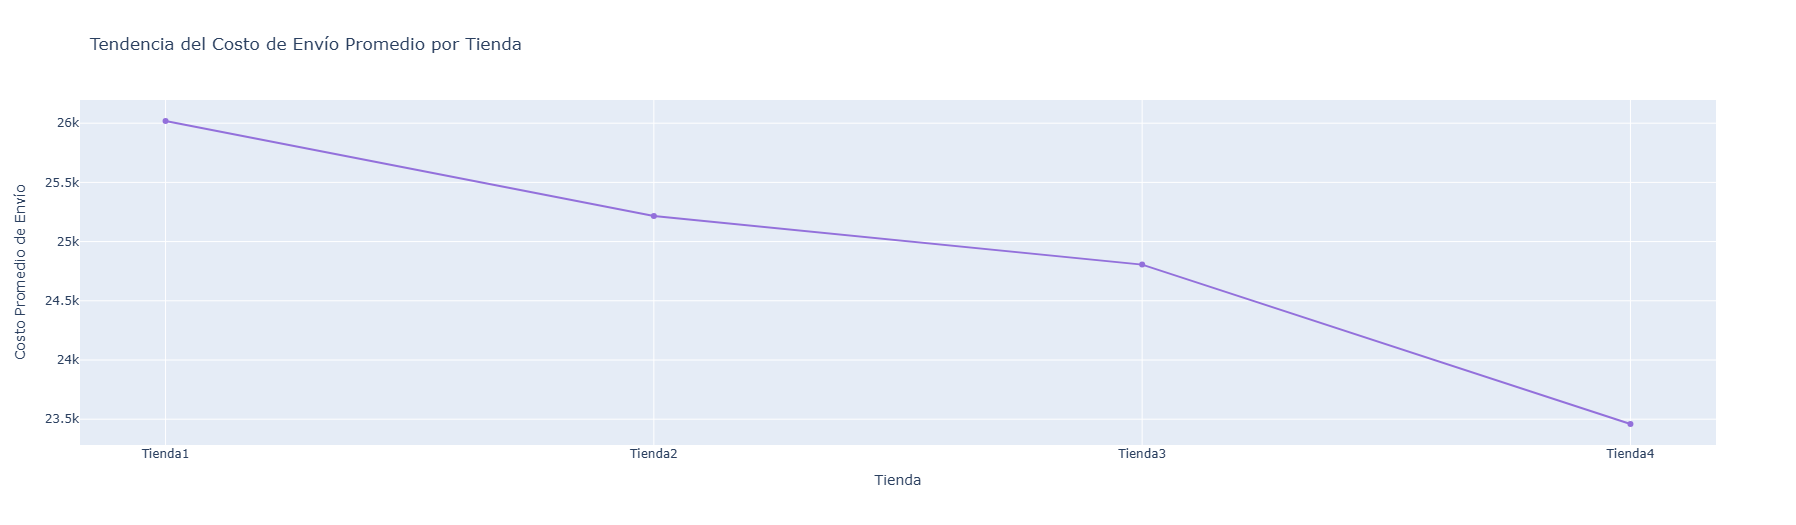

✅ **Tienda4** tiene el **menor costo promedio de envío**, lo cual sugiere eficiencia logística.

---

## 5. 🛍️ Productos más y menos vendidos

(Resumen general por tienda)

| Tienda  | Más vendido              | Menos vendido              |
|---------|--------------------------|-----------------------------|
| Tienda1 | Muebles                  | Artículos para el hogar     |
| Tienda2 | Muebles                  | Artículos para el hogar     |
| Tienda3 | Muebles                  | Instrumentos musicales      |
| Tienda4 | Muebles                  | Instrumentos musicales      |


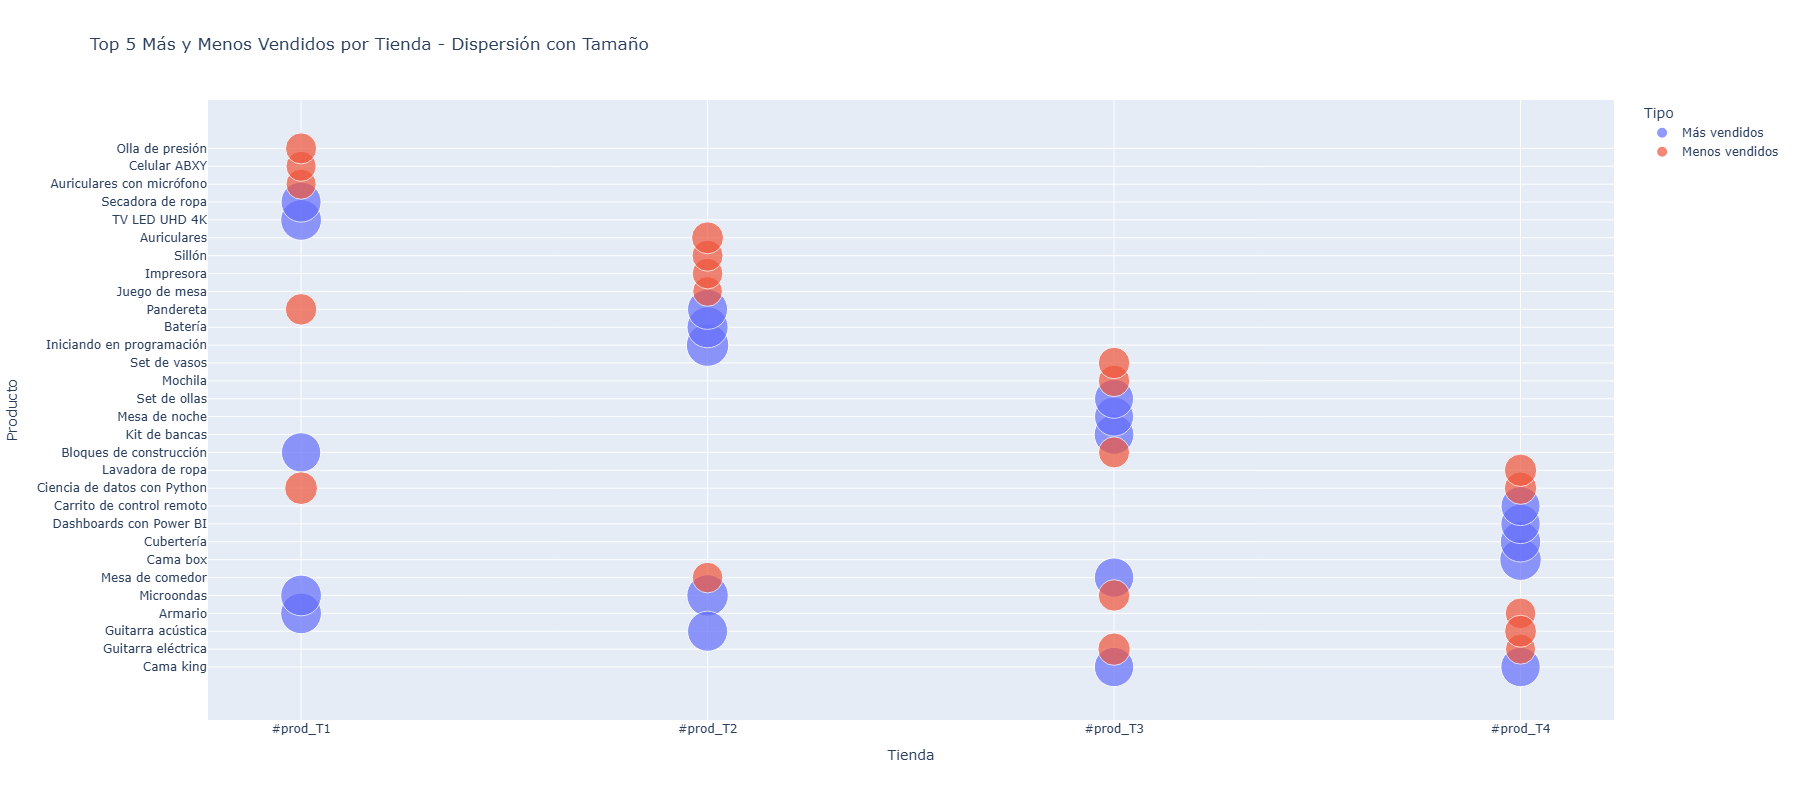
---

## ✅ Conclusión y Recomendación Final

Aunque **Tienda4** tiene el menor ingreso total, también:

- Presenta **la mejor calificación por parte de los clientes**.
- Tiene **el costo de envío más bajo**.
- Mantiene **altas ventas en categorías clave** como *Muebles*, *Juguetes* y *Electrónicos*.

📌 Esto indica que **la Tienda4 es eficiente y con buena reputación**, pero puede estar limitada por ubicación, tamaño u oferta.

> 💡 **Recomendación Final:** El Sr. Juan debería **vender la Tienda4**, capitalizando su buen rendimiento operativo y reputación, y comenzar su nuevo emprendimiento con esos recursos.

---


In [14]:
import seaborn as sns
import folium
from folium.plugins import HeatMap


# Añadir columna para identificar la tienda
tienda["Tienda"] = "Tienda1"
tienda2["Tienda"] = "Tienda2"
tienda3["Tienda"] = "Tienda3"
tienda4["Tienda"] = "Tienda4"

# Unir todas las tiendas
df = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)


# 🗺️ Análisis del Desempeño Geográfico

## 🎯 Objetivo
Explorar los datos de ventas de las tiendas utilizando **coordenadas geográficas** (latitud y longitud) para identificar patrones regionales de compra, concentraciones de ventas y desempeño por ubicación.



In [24]:
m = folium.Map(location=[4.5709, -74.2973], zoom_start=5)
heat_data = [[row['lat'], row['lon']] for index, row in df.iterrows()]
HeatMap(heat_data, radius=10).add_to(m)

m

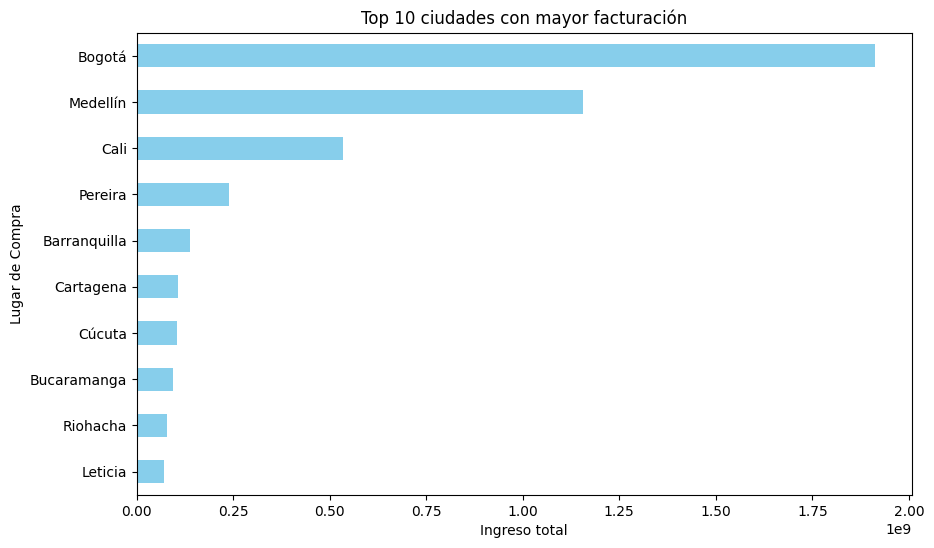

In [17]:
df["Ingreso"] = df["Precio"] + df["Costo de envío"]
ingresos_ciudad = df.groupby("Lugar de Compra")["Ingreso"].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
ingresos_ciudad.head(10).plot(kind="barh", color="skyblue")
plt.title("Top 10 ciudades con mayor facturación")
plt.xlabel("Ingreso total")
plt.gca().invert_yaxis()
plt.show()


## Conclusiones
* Las ciudades con mayor concentración de ventas son Bogotá, Medellín, y Cali.

* El ingreso total se concentra principalmente en grandes ciudades, como Bogotá y Medellín.